In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('ex1data2.txt',delimiter=',')
data.shape

(47, 3)

In [3]:
X = data[:,0:-1].reshape(-1,2)
y = data[:,-1].reshape(-1,1)
m =y.size
m

47

In [4]:
# Calculating mean and standard deviation for feature normalization
mu = np.mean(X,axis=0)
sigma = np.std(X,axis=0)
mu,sigma

(array([2000.68085106,    3.17021277]),
 array([7.86202619e+02, 7.52842809e-01]))

In [5]:
# Feature Normalization
def fnormalize(X,mu,sigma):
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        temp_X = X[:,i]
        temp_X = (temp_X-mu[i])/sigma[i]
        X_norm[:,i]=temp_X
    return X_norm


In [6]:
# Feature Normalization  
# Adding a columns of ones to normalized X
X_norm = fnormalize(X,mu,sigma)
X_norm = np.hstack((np.ones((m,1)),X_norm))


In [7]:
# Intializing our parameter vector theta to zeros
theta = np.zeros((X_norm.shape[1],1))
theta

array([[0.],
       [0.],
       [0.]])

In [8]:
# Cost Function
def cost(X,y,theta):
    m = np.size(y)
    J = (1/(2.0*m))*np.sum(np.power((X.dot(theta)-y),2))
    return J

In [9]:
# Finding the cost with theta intialized to zeros
J = cost(X_norm,y,theta)
J

65591548106.45744

In [10]:
# Some Gradient Descent Settings
alpha = 0.03
num_iters = 400

In [11]:
# Gradient Descent
def gdescent(X,y,theta,alpha,iters):
    X = np.mat(X); y=np.mat(y); theta = np.mat(theta);
    m = np.size(y)
    J_hist = np.zeros(iters)
    for i in range(0,iters):
        temp = theta - (alpha/m) * (X.T * (X*theta-y))
        theta = temp
        J_hist[i]= cost(X,y,theta)
        
    return np.asarray(theta),J_hist


In [12]:
# Getting the optimum parameters using gradient descent
final_theta,cost_hist = gdescent(X_norm,y,theta
                                        ,alpha,num_iters)
final_theta

array([[340410.91897274],
       [109162.68848142],
       [ -6293.24735132]])

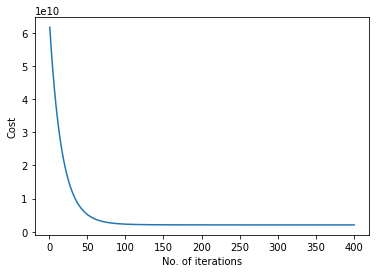

In [13]:
# Checking whether gradient descent has converged
plt.plot(np.arange(1,num_iters+1),cost_hist)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

In [14]:
# Cost at optimum theta
J_final = cost(X_norm,y,final_theta)
J_final

2043315820.8112059

In [15]:
# Price Prediction of a 1650 sq-ft, 3 bedroom house
# Pre processing the features
tempVal = np.array([1650,3]).reshape(1,-1)
tempVal = fnormalize(tempVal,mu,sigma)
tempVal = np.hstack((np.ones((1,1)),tempVal))
tempVal


array([[ 1.        , -0.44604386, -0.22609337]])

In [16]:
# Actual Prediction
price = tempVal.dot(final_theta)
print "Predicted price of a 1650 sq-ft, 3 bedrooms house:\n $",price

Predicted price of a 1650 sq-ft, 3 bedrooms house:
 $ [[293142.43348541]]
